In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 6s 1us/step


In [6]:
len(X_train)
len(X_test)

10000

In [12]:
X_train[0].shape

(28, 28)

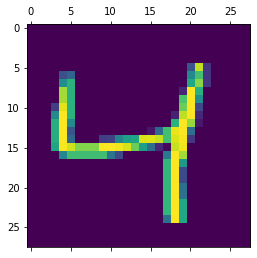

In [16]:
plt.matshow(X_train[2])

In [17]:
y_train[2]

4

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [31]:
X_train = X_train / 255
X_test = X_test / 255

In [32]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [28]:
# X_train_flattened[1]

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4688 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9262


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9244


[0.26745760440826416, 0.9243999719619751]

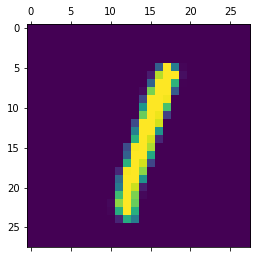

In [43]:
plt.matshow(X_test[5])

In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted[5]

array([7.3442439e-05, 9.9816370e-01, 4.8626980e-01, 3.9587033e-01,
       7.3489547e-03, 2.0742595e-02, 7.6950788e-03, 5.7289499e-01,
       5.1194459e-01, 1.7312530e-01], dtype=float32)

In [45]:
np.argmax(y_predicted[5])

1

In [46]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [49]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    6,    3,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    9,  932,   14,    7,    5,   11,   10,   36,    5],
       [   4,    0,   21,  904,    0,   40,    2,   11,   19,    9],
       [   2,    2,    7,    1,  901,    0,    7,    4,    9,   49],
       [   8,    3,    7,   17,    5,  804,    8,    4,   29,    7],
       [  13,    3,   10,    1,    7,   26,  893,    2,    3,    0],
       [   1,    5,   23,    7,    5,    1,    0,  942,    3,   41],
       [   7,    9,    7,   20,    9,   43,    7,   11,  849,   12],
       [   9,    7,    2,    9,   16,    9,    0,   15,    4,  938]])>

Text(69.0, 0.5, 'Truth')

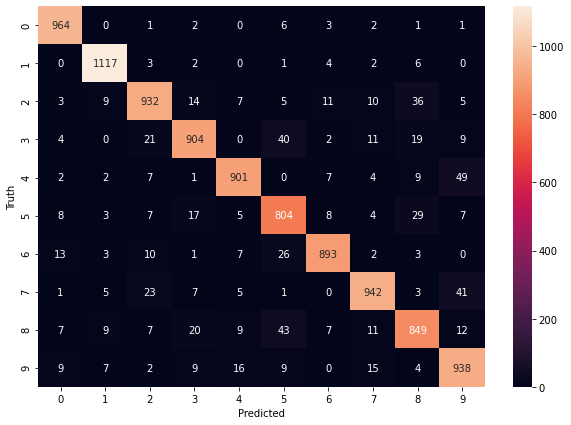

In [50]:
import seaborn as sns
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2765 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1238 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0873 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0665 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0514 - accuracy: 0.9844


In [52]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.9758


[0.07893981784582138, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

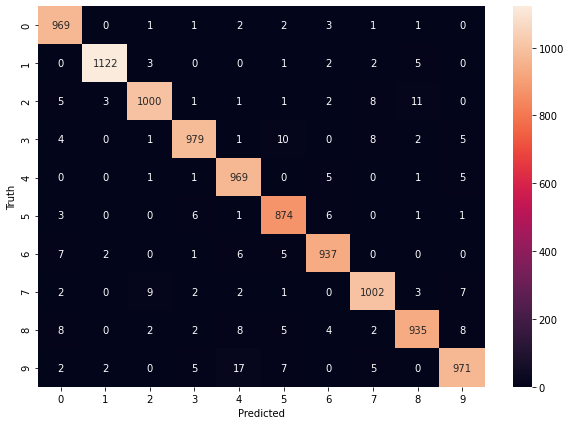

In [53]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2695 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1201 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0510 - accuracy: 0.9843
